In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
os.chdir("C:\\Users\\ahmed\\Desktop")
df_original = pd.read_pickle('valid_2016_activities.pkl')

df_original

,hashedathleteid,startdatelocal,totaldistance,time_final,pace_diff,pace_cumul
0,95677d84985ba9b57af15ba6fb343b481ada0d763667f7...,2016-07-30 09:00:45,1619.1,NaN,"[0.0, 10.3169659004383, 10.6190567781152, 11.4...","[25.0, 10.6567734982354, 10.528614260157, 10.4..."
1,2a6e4f6d45004a1eb86ed3429a1d454b7f42dea00c7160...,2016-07-30 09:01:30,8083.4,NaN,"[0.0, 5.79009107633454, 5.73073071960409, 6.55...","[25.0, 6.11933771164674, 5.73416775589949, 5.8..."
2,17dabbcf65d565fe4630fd298a2a06e130e5f24b49afb7...,2016-07-30 09:01:49,25055.6,NaN,"[0.0, 5.4484125669084, 5.04852901485874, 5.500...","[25.0, 5.42977967921349, 5.41131794574438, 5.4..."
3,9b9f3a3370d9189376b02cb39fbb542f4d1b59db4f9c86...,2016-07-30 09:01:59,4841.8,NaN,"[0.0, 7.54458251960452, 5.8741801258094, 6.426...","[25.0, 7.74597333418333, 6.73914419713155, 6.7..."
4,c40943a9a2aa5f49194d1368d28eed50ded43f6d567c64...,2016-07-30 09:02:00,26748.9,NaN,"[0.0, 5.82797385860512, 5.25262537318066, 5.85...","[25.0, 6.52248670842678, 6.07538033335372, 5.9..."
...,...,...,...,...,...,...
86070,cdc551b3cdc7c7356e4d229cb79ed3c667f390a141f079...,2016-10-31 18:40:48,6645.9,NaN,"[0.0, 6.52939360701984, 5.98680159678725, 6.45...","[25.0, 7.19752474742447, 6.96519310620352, 6.7..."
86071,dd25bdc1767ba0d49aa053d49ec4841a34b783768d2b70...,2016-10-31 18:44:02,5089.8,NaN,"[0.0, 8.12645609813947, 6.55519951742041, 6.21...","[25.0, 25.0, 19.5941887596533, 15.104212762808..."
86072,fe4054672c0f8cab4533fb9dc5e1e3d9f7003178e9bd6e...,2016-10-31 18:44:05,9854.6,NaN,"[0.0, 5.48043844091235, 5.73180422399826, 5.63...","[25.0, 5.43730641872743, 5.49974717246962, 5.7..."
86073,60bb1d839cf0ff15b6fe581f50043c776a428b8c3122e0...,2016-10-31 18:48:39,7360.8,NaN,"[0.0, 6.77072839704103, 6.06951658105542, 6.41...","[25.0, 6.35856269427718, 6.41950589893724, 6.4..."


In [3]:
#STEP 1
#We only want the marathon run times first
marathon = df_original.copy()
marathon.dropna(subset = ["time_final"], inplace=True)
marathon

,hashedathleteid,startdatelocal,totaldistance,time_final,pace_diff,pace_cumul
789,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-07-31 06:42:47,42968.2,14114.0,"[0.0, 4.60733605901217, 5.7649692938301, 5.429...","[25.0, 5.34543774578994, 5.30831753268985, 5.2..."
18413,a08aaa42a26bae4d065ebc13bdb68c771588a6d5c7342f...,2016-08-20 09:40:15,44005.0,18037.0,"[0.0, 4.59185876371685, 4.27624990529564, 5.28...","[25.0, 11.4949353824337, 8.44717361244804, 7.4..."
18417,73dc48fa5cf39802419aff2391d4ac6143e00581f45c7b...,2016-08-20 09:41:24,42728.2,13787.0,"[0.0, 5.16621037233879, 6.02002950709635, 5.99...","[25.0, 5.34431840955686, 5.18868383844542, 5.3..."
18423,5d4929d1ea51883164518c857408b44ad49a0907fe2bd0...,2016-08-20 09:42:49,42485.0,15438.0,"[0.0, 5.17733388991839, 4.77337557174206, 4.81...","[25.0, 4.78631238969546, 4.99234179293599, 4.9..."
38827,3efa344cbcef6ac58a3350c32cb2e2f8a6a29ac88c5348...,2016-09-11 07:59:57,42552.0,10823.0,"[0.0, 4.26472493754826, 5.46190556248581, 3.85...","[25.0, 4.02107609094347, 4.22696842892465, 4.2..."
...,...,...,...,...,...,...
85974,09ded51f745938cb0380897c5878116df2e071664a5e42...,2016-10-30 10:00:10,42453.2,9882.0,"[0.0, 4.36909719595357, 3.92496883950346, 3.66...","[25.0, 4.5114960209356, 4.34896158056502, 4.27..."
85975,77bf18e9cbee348d1b38172dca326d091c6dad8d39c068...,2016-10-30 10:05:30,37611.0,14217.0,"[0.0, 6.50700341324959, 4.74854320872808, 5.01...","[25.0, 5.59367755096785, 5.48660882240485, 5.4..."
85976,c625528dbc73b2c63b6585fe797327e9c884e02347deaa...,2016-10-30 10:10:25,42779.5,13054.0,"[0.0, 6.2792826536363, 5.85257597092785, 3.652...","[25.0, 6.48672342297235, 6.15292877731785, 5.9..."
85977,1fab4f6334ede2c0c31ecbd74baf6d78c6bcb564851703...,2016-10-30 10:20:26,42709.2,16524.0,"[0.0, 6.60532575442649, 6.16138602027538, 7.32...","[25.0, 7.02301611599053, 6.79435024788554, 6.6..."


In [4]:
#Say we have a user, they specify what is their goal time.
hours = 3
mins = 27
seconds = 0
time_wanted = (hours*60*60) + (mins*60) + seconds
#We will take anything within the 5 secs range
marathon_new = marathon[marathon.time_final < (time_wanted + 300)]
marathon_new = marathon_new[marathon_new.time_final > (time_wanted - 300)]
marathon_new

,hashedathleteid,startdatelocal,totaldistance,time_final,pace_diff,pace_cumul
44918,c21dc0cd24cfa67de763fdc772dc3dca5cdc75d213e9b8...,2016-09-17 10:15:05,42306.6,12464.0,"[0.0, 3.98058371366846, 4.39216728513932, 3.90...","[25.0, 2.75980927453233, 3.5693568906198, 3.82..."
44922,9e273c2a2db3c7818b326ea47d6789676700c2359448d1...,2016-09-17 10:15:36,42068.1,12537.0,"[0.0, 5.5740862733255, 5.66096390117342, 5.448...","[25.0, 5.51360426096645, 5.57288682620049, 5.5..."
44923,bbf49208eae9983ef4b416fd562991d5b25fade038c227...,2016-09-17 10:15:46,42905.3,12702.0,"[0.0, 5.89242870783479, 5.29862305063809, 4.75...","[25.0, 5.53896321748517, 5.44101524160455, 5.3..."
52732,caf5124f28a132c973fc158c57cb71f000c595e0fbdfb7...,2016-09-25 10:20:31,42541.6,12379.0,"[0.0, 4.72560269081904, 4.7198035877548, 4.962...","[25.0, 4.85944126036254, 4.87051586320262, 4.9..."
52733,9e72b76444791ecd956fcb99a4be5428e2a285bd323ec7...,2016-09-25 10:20:31,42541.6,12379.0,"[0.0, 4.72560269081904, 4.7198035877548, 4.962...","[25.0, 4.85944126036254, 4.87051586320262, 4.9..."
...,...,...,...,...,...,...
85748,9dec97d65d3cd26e68ee4bae22c091f0162555913de753...,2016-10-30 09:30:02,42495.3,12677.0,"[0.0, 3.98203158734236, 3.75889223470829, 5.16...","[25.0, 4.6923809854157, 4.24149219515285, 4.44..."
85757,f3d4aa1b1c285ad53a8ee51b415da741ae9605fd81d966...,2016-10-30 09:30:05,42523.7,12416.0,"[0.0, 4.68300904024919, 4.27611047953751, 4.22...","[25.0, 5.18066631381596, 4.85490615844835, 4.6..."
85760,4baec0df313e0274ab90c947559bdf4464dc1b80f7a664...,2016-10-30 09:30:06,42560.9,12636.0,"[0.0, 4.9167053673036, 4.41041278166917, 4.216...","[25.0, 5.52979798717559, 5.12291762696697, 4.7..."
85901,9f00533b95ca043dd2b54427e428d922adc9dec26324e5...,2016-10-30 09:32:10,42577.7,12540.0,"[0.0, 3.89973865750696, 7.12932641348672, 9.10...","[25.0, 3.93774382105981, 4.71180049280402, 4.9..."


In [5]:
list_of_ids = marathon_new['hashedathleteid'].to_list()
list_of_ids
#STEP 1 DONE - Users Identified

['c21dc0cd24cfa67de763fdc772dc3dca5cdc75d213e9b8e0c1a2ed05fec9057b',
 '9e273c2a2db3c7818b326ea47d6789676700c2359448d143e14acde6f196f9c8',
 'bbf49208eae9983ef4b416fd562991d5b25fade038c227a0e6ac2e1dfa86fe34',
 'caf5124f28a132c973fc158c57cb71f000c595e0fbdfb729700fffb60bfa1287',
 '9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8',
 'fd8db22c22b3f582fc072415cf2c91d9ca9b69290c87710404e2881729481000',
 'cb6bfe7a70791a1fbb98d0a6b6befa7fe918ed2d23b477e2b1067593ef1e6b25',
 'b8d860e8abb9eebcfa6a475bcff4078fd1572074d1946076087938a7c9098f15',
 '04e48e8b5de6a8ed647380740ae31929e2d7c71b97ec8e92bf505289ee0df5b0',
 '20dd63b9d7c67adcc9f2443215f76e307d1ed75fa4514b34640d12ae1d05dd4c',
 '2142b460895068fb2eeec94cb6dc1d8596ff0791666312a6ce5ba7a7eafad373',
 '07323377d886fbce918d241457d4228208ef08e9eababd79f679e498857a3776',
 '3d4caceb9ed6c7b8f5b852d5d4b4814ef21240e9afead9e26dfe0f5187b59eff',
 'c5deacca4ec7882e8f5865b9af3cf4e323906fbf00744ab2139a3afc89f87160',
 'e93984c99742f747fcc092da4fb9ac33

In [1]:
import random

#for x in range(0, 2):
#    final = df_original[df_original['hashedathleteid'].str.contains(random.choice(list_of_ids))] 
requiredid = '2142b460895068fb2eeec94cb6dc1d8596ff0791666312a6ce5ba7a7eafad373'
final = df_original[df_original['hashedathleteid'].str.contains(requiredid)]     
final

'2142b460895068fb2eeec94cb6dc1d8596ff0791666312a6ce5ba7a7eafad373'

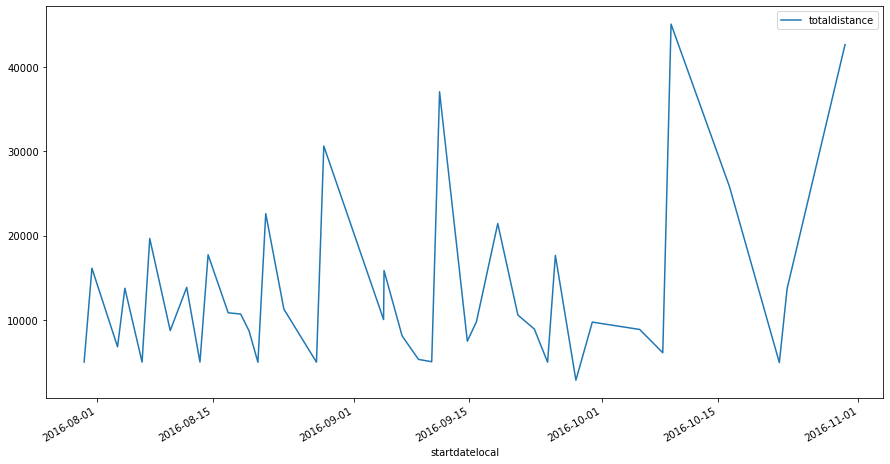

In [7]:
import matplotlib.pyplot as plt
plt.close()
in_df = final[['startdatelocal','totaldistance']]
in_df[['startdatelocal','totaldistance']].plot('startdatelocal', figsize=(15,8))
#in_df.plot()

plt.show()


In [8]:
#Get list of all activites of users found
end = final
lenofid = len(list_of_ids)
i = 0
DF_list= list()
while i<lenofid:
    temp = df_original[df_original['hashedathleteid'].str.contains(list_of_ids[i])]
    #print(temp.head(2))
    #new = pd.concat([end, temp])
    DF_list.append(temp)
    i += 1

activities_final = pd.concat(DF_list)  

#add a new column : average pcae
avg_pace = activities_final.pace_cumul.values

length = len(avg_pace) 
result = []   
 
for i in range(length): 
    result.append(avg_pace[i][-1])
    
activities_final['avg_pace'] = result

#add a new column : max pace
max_pace = activities_final.pace_diff.values

m_length = len(max_pace) 
m_result = []   
 
for i in range(m_length): 
    m_result.append(max(max_pace[i]))
    
activities_final['max_pace'] = m_result


#add a new column : min pace
def second_smallest(numbers):
    m1, m2 = float('inf'), float('inf')
    for x in numbers:
        if x <= m1:
            m1, m2 = x, m1
        elif x < m2:
            m2 = x
    return m2

min_pace = activities_final.pace_diff.values

mi_length = len(min_pace) 
mi_result = []   
 
for i in range(mi_length): 
    mi_result.append(second_smallest(min_pace[i]))
    
activities_final['min_pace'] = mi_result

#add a new column : stdv pace
pace = activities_final.pace_diff.values
s_length = len(pace)
s_result = []
for i in range(s_length): 
    s_result.append(np.std(pace[i]))

activities_final['stdv_pace'] = s_result

#add a new column : gap
times = pd.Series(activities_final["startdatelocal"])
y = np.diff(times)
results = []
for i in range(len(y)):
    x = y[i]
    hours = x.astype('timedelta64[h]')  #in hours
    results.append(hours / np.timedelta64(1, 'h'))

results = [None if i < 0 else i for i in results] #contains gap between excersise but need to be per runner
results.insert(0,None)
activities_final['gap/interval'] = results

activities_final

,hashedathleteid,startdatelocal,totaldistance,time_final,pace_diff,pace_cumul,avg_pace,max_pace,min_pace,stdv_pace,gap/interval
681,c21dc0cd24cfa67de763fdc772dc3dca5cdc75d213e9b8...,2016-07-30 17:28:33,8001.3,NaN,"[0.0, 4.03611807411674, 5.58385484631883, 3.92...","[25.0, 4.66561661736935, 4.21626081808329, 4.1...",3.984633,5.583855,3.341687,0.579379,NaN
697,c21dc0cd24cfa67de763fdc772dc3dca5cdc75d213e9b8...,2016-07-30 18:00:30,956.5,NaN,"[0.0, 7.10107089226516, 6.76523940911125, 6.78...","[25.0, 7.10570987947557, 6.97180417396841, 7.2...",6.618915,8.906387,5.941297,2.184839,0.0
15409,c21dc0cd24cfa67de763fdc772dc3dca5cdc75d213e9b8...,2016-08-16 19:30:54,15282.6,NaN,"[0.0, 5.70213994691611, 4.90058234304103, 4.81...","[25.0, 8.78360345459665, 6.97202243930118, 6.3...",4.884384,14.246289,4.037418,0.966826,409.0
17511,c21dc0cd24cfa67de763fdc772dc3dca5cdc75d213e9b8...,2016-08-18 20:16:46,12015.0,NaN,"[0.0, 4.09946680451404, 4.07780482396734, 3.85...","[25.0, 4.5324484043789, 4.25519255614328, 4.16...",4.091407,6.183575,3.150960,0.529394,48.0
17800,c21dc0cd24cfa67de763fdc772dc3dca5cdc75d213e9b8...,2016-08-19 09:15:07,8986.3,NaN,"[0.0, 4.92480252526538, 4.66936854778357, 5.13...","[25.0, 5.02081850289977, 4.90931161504738, 5.0...",5.680340,7.993068,4.668355,0.848834,12.0
...,...,...,...,...,...,...,...,...,...,...,...
76334,a80056fd2f854bd204bb890893e4efa7aa7edc9241cbaf...,2016-10-20 07:09:01,14643.9,NaN,"[0.0, 5.90067928494779, 4.886589676684, 5.2346...","[25.0, 15.3781376435748, 10.23031636174, 8.695...",5.144749,16.097760,3.695352,1.251722,48.0
78789,a80056fd2f854bd204bb890893e4efa7aa7edc9241cbaf...,2016-10-22 16:12:41,27369.0,NaN,"[0.0, 5.16318154224465, 5.14762746158786, 4.56...","[25.0, 5.20676349992266, 5.49236449848379, 5.6...",5.476485,23.239573,3.691246,1.295125,57.0
80622,a80056fd2f854bd204bb890893e4efa7aa7edc9241cbaf...,2016-10-25 06:58:27,14638.4,NaN,"[0.0, 5.11723752143712, 6.28112989544453, 6.97...","[25.0, 5.7900944230009, 6.06212911713051, 6.40...",4.967051,7.876910,3.236209,0.787036,62.0
82758,a80056fd2f854bd204bb890893e4efa7aa7edc9241cbaf...,2016-10-27 19:22:00,10315.8,NaN,"[0.0, 6.04435522317931, 4.81556832028722, 4.60...","[25.0, 6.19881085346812, 5.81110554049949, 5.8...",5.759250,9.697298,3.477250,0.962006,60.0


In [9]:
#Put these in a weekly format
dr = pd.date_range('2016-06-01 00:00:00', periods=32, freq='W-SUN')
def featureEngineering(df):
    gr = df.groupby(["hashedathleteid", pd.Grouper(key='startdatelocal',label='left', freq='W-SUN')])
    for (hashedathleteid, week), group in gr:
        print(hashedathleteid, week)
        total_km = group["totaldistance"].sum()/1000
        max_km = group["totaldistance"].max()/1000
        min_km = group["totaldistance"].min()/1000
        var_km = math.sqrt(group["totaldistance"].var())/1000
        average_km = group["totaldistance"].mean()/1000
        num_runs = group["totaldistance"].count()
        average_pace = group["avg_pace"].mean()
        max_pace = group["max_pace"].max()
        min_pace = group["min_pace"].min()
        stdv_pace = group["stdv_pace"].mean()
        gap = group["gap/interval"].mean()
#         date_label
        num_20k = group[group['totaldistance'] >= 20000]['totaldistance'].count()
        num_30k = group[group['totaldistance'] >= 30000]['totaldistance'].count()
        
        
        #print(group)
        yield {'hashedathleteid': hashedathleteid, 
               'week': week,
               'total_km': total_km, 'num_runs': num_runs, 'num_20k': num_20k, 'num_30k': num_30k, 
               'max_km': max_km, 'min_km': min_km, 'stdv_km': var_km,'average_km' : average_km,  
               'max_pace': max_pace, 'min_pace': min_pace, 'stdv_pace': stdv_pace, 'average_pace': average_pace, 'gap': gap}
    return
a_id = list_of_ids
df_features = pd.DataFrame(featureEngineering(activities_final.query('hashedathleteid == @a_id')))
df_features
#STEP 2 DONE
#df_features: contains a weekly summary for each runner
#activites_final: contains all activites done by the selected runners

037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-07-24 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-07-31 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-08-07 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-08-14 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-08-21 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-09-04 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-09-11 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-09-18 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-09-25 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-10-02 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 2016-10-09 00:00:00
037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec74da0776958b04c8f2 

09223b740a5057abe83aa0b3f0fdad37f45689e5305161e990f9157f27686c1c 2016-09-04 00:00:00
09223b740a5057abe83aa0b3f0fdad37f45689e5305161e990f9157f27686c1c 2016-09-11 00:00:00
09223b740a5057abe83aa0b3f0fdad37f45689e5305161e990f9157f27686c1c 2016-09-18 00:00:00
09223b740a5057abe83aa0b3f0fdad37f45689e5305161e990f9157f27686c1c 2016-09-25 00:00:00
09223b740a5057abe83aa0b3f0fdad37f45689e5305161e990f9157f27686c1c 2016-10-02 00:00:00
09223b740a5057abe83aa0b3f0fdad37f45689e5305161e990f9157f27686c1c 2016-10-09 00:00:00
09223b740a5057abe83aa0b3f0fdad37f45689e5305161e990f9157f27686c1c 2016-10-16 00:00:00
09223b740a5057abe83aa0b3f0fdad37f45689e5305161e990f9157f27686c1c 2016-10-23 00:00:00
0acb4c26df55bd0d8d6d7bc74a8327bd059b04c70d6829961d19a4ef8469f13a 2016-07-24 00:00:00
0acb4c26df55bd0d8d6d7bc74a8327bd059b04c70d6829961d19a4ef8469f13a 2016-07-31 00:00:00
0acb4c26df55bd0d8d6d7bc74a8327bd059b04c70d6829961d19a4ef8469f13a 2016-08-07 00:00:00
0acb4c26df55bd0d8d6d7bc74a8327bd059b04c70d6829961d19a4ef8469f13a 

170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-07-31 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-08-07 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-08-14 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-08-21 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-08-28 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-09-04 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-09-11 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-09-18 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-09-25 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-10-02 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 2016-10-09 00:00:00
170a318ce931feb9cbd14e89a9a4ac223c540e5fc220c4a46996a24235cfe01a 

1f7eecda288675a157457a68840d5e906dbaea65c9aa09d34e2546de1ae20dff 2016-10-16 00:00:00
1f7eecda288675a157457a68840d5e906dbaea65c9aa09d34e2546de1ae20dff 2016-10-23 00:00:00
20dd63b9d7c67adcc9f2443215f76e307d1ed75fa4514b34640d12ae1d05dd4c 2016-09-11 00:00:00
20dd63b9d7c67adcc9f2443215f76e307d1ed75fa4514b34640d12ae1d05dd4c 2016-09-18 00:00:00
20dd63b9d7c67adcc9f2443215f76e307d1ed75fa4514b34640d12ae1d05dd4c 2016-09-25 00:00:00
20dd63b9d7c67adcc9f2443215f76e307d1ed75fa4514b34640d12ae1d05dd4c 2016-10-02 00:00:00
20dd63b9d7c67adcc9f2443215f76e307d1ed75fa4514b34640d12ae1d05dd4c 2016-10-09 00:00:00
20dd63b9d7c67adcc9f2443215f76e307d1ed75fa4514b34640d12ae1d05dd4c 2016-10-16 00:00:00
20dd63b9d7c67adcc9f2443215f76e307d1ed75fa4514b34640d12ae1d05dd4c 2016-10-23 00:00:00
2142b460895068fb2eeec94cb6dc1d8596ff0791666312a6ce5ba7a7eafad373 2016-07-24 00:00:00
2142b460895068fb2eeec94cb6dc1d8596ff0791666312a6ce5ba7a7eafad373 2016-07-31 00:00:00
2142b460895068fb2eeec94cb6dc1d8596ff0791666312a6ce5ba7a7eafad373 

29f511ab046ac887eeb6c808e81dc20bed6cc5d6e60b16407df6e7ebf844dd8a 2016-10-23 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 2016-07-24 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 2016-07-31 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 2016-08-07 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 2016-08-14 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 2016-08-21 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 2016-08-28 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 2016-09-04 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 2016-09-11 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 2016-09-18 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 2016-09-25 00:00:00
2af81843dcd6c4556de04589f3d60070ac2d6439667d2db7e7d83cf360262ea2 

39d4e1fbc4f697eaa4265cf1532f094538adb779853c1cf2d3a4b6b44f236637 2016-10-02 00:00:00
39d4e1fbc4f697eaa4265cf1532f094538adb779853c1cf2d3a4b6b44f236637 2016-10-09 00:00:00
39d4e1fbc4f697eaa4265cf1532f094538adb779853c1cf2d3a4b6b44f236637 2016-10-16 00:00:00
39d4e1fbc4f697eaa4265cf1532f094538adb779853c1cf2d3a4b6b44f236637 2016-10-23 00:00:00
39d847849bdfe787593b7a04fe27aeda46ec300b5b5177d9c2e382f00213026d 2016-07-31 00:00:00
39d847849bdfe787593b7a04fe27aeda46ec300b5b5177d9c2e382f00213026d 2016-08-14 00:00:00
39d847849bdfe787593b7a04fe27aeda46ec300b5b5177d9c2e382f00213026d 2016-08-21 00:00:00
39d847849bdfe787593b7a04fe27aeda46ec300b5b5177d9c2e382f00213026d 2016-09-11 00:00:00
39d847849bdfe787593b7a04fe27aeda46ec300b5b5177d9c2e382f00213026d 2016-09-18 00:00:00
39d847849bdfe787593b7a04fe27aeda46ec300b5b5177d9c2e382f00213026d 2016-09-25 00:00:00
39d847849bdfe787593b7a04fe27aeda46ec300b5b5177d9c2e382f00213026d 2016-10-02 00:00:00
39d847849bdfe787593b7a04fe27aeda46ec300b5b5177d9c2e382f00213026d 

3e7feba8b5f5f99afb5f663535e80df910f53022aebbda0542dcee41a1e4bbdc 2016-08-28 00:00:00
3e7feba8b5f5f99afb5f663535e80df910f53022aebbda0542dcee41a1e4bbdc 2016-09-04 00:00:00
3e7feba8b5f5f99afb5f663535e80df910f53022aebbda0542dcee41a1e4bbdc 2016-09-11 00:00:00
3e7feba8b5f5f99afb5f663535e80df910f53022aebbda0542dcee41a1e4bbdc 2016-09-18 00:00:00
3e7feba8b5f5f99afb5f663535e80df910f53022aebbda0542dcee41a1e4bbdc 2016-09-25 00:00:00
3e7feba8b5f5f99afb5f663535e80df910f53022aebbda0542dcee41a1e4bbdc 2016-10-02 00:00:00
3e7feba8b5f5f99afb5f663535e80df910f53022aebbda0542dcee41a1e4bbdc 2016-10-09 00:00:00
3e7feba8b5f5f99afb5f663535e80df910f53022aebbda0542dcee41a1e4bbdc 2016-10-16 00:00:00
3e7feba8b5f5f99afb5f663535e80df910f53022aebbda0542dcee41a1e4bbdc 2016-10-23 00:00:00
3eaec74b8fa2a4501df24928f4f602ca1660e42e2c97800ec8cc0e53bea87838 2016-07-24 00:00:00
3eaec74b8fa2a4501df24928f4f602ca1660e42e2c97800ec8cc0e53bea87838 2016-07-31 00:00:00
3eaec74b8fa2a4501df24928f4f602ca1660e42e2c97800ec8cc0e53bea87838 

4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-07-24 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-07-31 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-08-07 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-08-14 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-08-21 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-08-28 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-09-04 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-09-11 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-09-18 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-09-25 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 2016-10-02 00:00:00
4aa9b947959afe1dce033591cd902dd50d5edbd9d318d7c6ae9238ecd71cad02 

54d5b62cd31d1862a3cad3d0b58b51046ad7dce5a54898a86a8d94fe7c5d5040 2016-08-21 00:00:00
54d5b62cd31d1862a3cad3d0b58b51046ad7dce5a54898a86a8d94fe7c5d5040 2016-08-28 00:00:00
54d5b62cd31d1862a3cad3d0b58b51046ad7dce5a54898a86a8d94fe7c5d5040 2016-09-04 00:00:00
54d5b62cd31d1862a3cad3d0b58b51046ad7dce5a54898a86a8d94fe7c5d5040 2016-09-11 00:00:00
54d5b62cd31d1862a3cad3d0b58b51046ad7dce5a54898a86a8d94fe7c5d5040 2016-09-18 00:00:00
54d5b62cd31d1862a3cad3d0b58b51046ad7dce5a54898a86a8d94fe7c5d5040 2016-09-25 00:00:00
54d5b62cd31d1862a3cad3d0b58b51046ad7dce5a54898a86a8d94fe7c5d5040 2016-10-02 00:00:00
54d5b62cd31d1862a3cad3d0b58b51046ad7dce5a54898a86a8d94fe7c5d5040 2016-10-09 00:00:00
54d5b62cd31d1862a3cad3d0b58b51046ad7dce5a54898a86a8d94fe7c5d5040 2016-10-16 00:00:00
54d5b62cd31d1862a3cad3d0b58b51046ad7dce5a54898a86a8d94fe7c5d5040 2016-10-23 00:00:00
56b66dd044ba6946882ad14724e199aac8bc97c46f434d55d17f58d41a9918a1 2016-10-23 00:00:00
56e06f206066636bb2eeda83f8b2abde5ae8c9980564639705050559cde75f26 

5e31c3631fd2d0cadfc7773535da04a570cadce4b1f596dbfd31157a987124f4 2016-10-23 00:00:00
5e31c3631fd2d0cadfc7773535da04a570cadce4b1f596dbfd31157a987124f4 2016-10-30 00:00:00
5f443837c1e27c099803d3a0ce3a2a8d6710919bcfdf0b04667b5e2df6e8bd21 2016-07-24 00:00:00
5f443837c1e27c099803d3a0ce3a2a8d6710919bcfdf0b04667b5e2df6e8bd21 2016-07-31 00:00:00
5f443837c1e27c099803d3a0ce3a2a8d6710919bcfdf0b04667b5e2df6e8bd21 2016-08-07 00:00:00
5f443837c1e27c099803d3a0ce3a2a8d6710919bcfdf0b04667b5e2df6e8bd21 2016-08-14 00:00:00
5f443837c1e27c099803d3a0ce3a2a8d6710919bcfdf0b04667b5e2df6e8bd21 2016-08-21 00:00:00
5f443837c1e27c099803d3a0ce3a2a8d6710919bcfdf0b04667b5e2df6e8bd21 2016-08-28 00:00:00
5f443837c1e27c099803d3a0ce3a2a8d6710919bcfdf0b04667b5e2df6e8bd21 2016-09-04 00:00:00
5f443837c1e27c099803d3a0ce3a2a8d6710919bcfdf0b04667b5e2df6e8bd21 2016-09-11 00:00:00
5f443837c1e27c099803d3a0ce3a2a8d6710919bcfdf0b04667b5e2df6e8bd21 2016-09-18 00:00:00
5f443837c1e27c099803d3a0ce3a2a8d6710919bcfdf0b04667b5e2df6e8bd21 

6cc3be5e7a2dcd719ba1611918ca53fdeb30a4ce67d1aba5ad925daa634eb894 2016-09-11 00:00:00
6cc3be5e7a2dcd719ba1611918ca53fdeb30a4ce67d1aba5ad925daa634eb894 2016-09-18 00:00:00
6cc3be5e7a2dcd719ba1611918ca53fdeb30a4ce67d1aba5ad925daa634eb894 2016-09-25 00:00:00
6cc3be5e7a2dcd719ba1611918ca53fdeb30a4ce67d1aba5ad925daa634eb894 2016-10-02 00:00:00
6cc3be5e7a2dcd719ba1611918ca53fdeb30a4ce67d1aba5ad925daa634eb894 2016-10-09 00:00:00
6cc3be5e7a2dcd719ba1611918ca53fdeb30a4ce67d1aba5ad925daa634eb894 2016-10-16 00:00:00
6cc3be5e7a2dcd719ba1611918ca53fdeb30a4ce67d1aba5ad925daa634eb894 2016-10-23 00:00:00
6d2859e63d87dc12ae66a8e027c9775170d3ced66b8b90237f08a429b136053c 2016-07-24 00:00:00
6d2859e63d87dc12ae66a8e027c9775170d3ced66b8b90237f08a429b136053c 2016-07-31 00:00:00
6d2859e63d87dc12ae66a8e027c9775170d3ced66b8b90237f08a429b136053c 2016-08-07 00:00:00
6d2859e63d87dc12ae66a8e027c9775170d3ced66b8b90237f08a429b136053c 2016-08-14 00:00:00
6d2859e63d87dc12ae66a8e027c9775170d3ced66b8b90237f08a429b136053c 

80d58b3fb245bf1e813fb8d25ae398c4238bae8185752f8da2600012a9860649 2016-09-18 00:00:00
80d58b3fb245bf1e813fb8d25ae398c4238bae8185752f8da2600012a9860649 2016-09-25 00:00:00
80d58b3fb245bf1e813fb8d25ae398c4238bae8185752f8da2600012a9860649 2016-10-02 00:00:00
80d58b3fb245bf1e813fb8d25ae398c4238bae8185752f8da2600012a9860649 2016-10-09 00:00:00
80d58b3fb245bf1e813fb8d25ae398c4238bae8185752f8da2600012a9860649 2016-10-16 00:00:00
80d58b3fb245bf1e813fb8d25ae398c4238bae8185752f8da2600012a9860649 2016-10-23 00:00:00
832b0496f397503d78f88181f7bf043c30b61bb60928aa91d8ccb6a1dc07de47 2016-07-31 00:00:00
832b0496f397503d78f88181f7bf043c30b61bb60928aa91d8ccb6a1dc07de47 2016-08-07 00:00:00
832b0496f397503d78f88181f7bf043c30b61bb60928aa91d8ccb6a1dc07de47 2016-08-14 00:00:00
832b0496f397503d78f88181f7bf043c30b61bb60928aa91d8ccb6a1dc07de47 2016-08-21 00:00:00
832b0496f397503d78f88181f7bf043c30b61bb60928aa91d8ccb6a1dc07de47 2016-08-28 00:00:00
832b0496f397503d78f88181f7bf043c30b61bb60928aa91d8ccb6a1dc07de47 

94a5bdc6bf7c854753e4041071b3cda67738cba2fef517d861eca56deaabbdc8 2016-10-02 00:00:00
94a5bdc6bf7c854753e4041071b3cda67738cba2fef517d861eca56deaabbdc8 2016-10-09 00:00:00
94a5bdc6bf7c854753e4041071b3cda67738cba2fef517d861eca56deaabbdc8 2016-10-16 00:00:00
94a5bdc6bf7c854753e4041071b3cda67738cba2fef517d861eca56deaabbdc8 2016-10-23 00:00:00
9838700b33c46ff7119a8db74142cc8cac2c96def100f50fe6c5fa83914386a1 2016-07-24 00:00:00
9838700b33c46ff7119a8db74142cc8cac2c96def100f50fe6c5fa83914386a1 2016-07-31 00:00:00
9838700b33c46ff7119a8db74142cc8cac2c96def100f50fe6c5fa83914386a1 2016-08-07 00:00:00
9838700b33c46ff7119a8db74142cc8cac2c96def100f50fe6c5fa83914386a1 2016-08-14 00:00:00
9838700b33c46ff7119a8db74142cc8cac2c96def100f50fe6c5fa83914386a1 2016-08-21 00:00:00
9838700b33c46ff7119a8db74142cc8cac2c96def100f50fe6c5fa83914386a1 2016-08-28 00:00:00
9838700b33c46ff7119a8db74142cc8cac2c96def100f50fe6c5fa83914386a1 2016-09-04 00:00:00
9838700b33c46ff7119a8db74142cc8cac2c96def100f50fe6c5fa83914386a1 

9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-08-07 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-08-14 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-08-21 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-08-28 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-09-04 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-09-11 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-09-18 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-09-25 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-10-02 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-10-09 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 2016-10-16 00:00:00
9e72b76444791ecd956fcb99a4be5428e2a285bd323ec78da44a054f814d4da8 

acaf7a5113f202deea11d9468e5e7002857b1571c0072e6321f367b89b89583c 2016-10-02 00:00:00
acaf7a5113f202deea11d9468e5e7002857b1571c0072e6321f367b89b89583c 2016-10-09 00:00:00
acaf7a5113f202deea11d9468e5e7002857b1571c0072e6321f367b89b89583c 2016-10-16 00:00:00
acaf7a5113f202deea11d9468e5e7002857b1571c0072e6321f367b89b89583c 2016-10-23 00:00:00
ada19fe016544433303e859166a8950c348d9a73e28446a33f7c6894d53f3632 2016-07-24 00:00:00
ada19fe016544433303e859166a8950c348d9a73e28446a33f7c6894d53f3632 2016-07-31 00:00:00
ada19fe016544433303e859166a8950c348d9a73e28446a33f7c6894d53f3632 2016-08-07 00:00:00
ada19fe016544433303e859166a8950c348d9a73e28446a33f7c6894d53f3632 2016-08-14 00:00:00
ada19fe016544433303e859166a8950c348d9a73e28446a33f7c6894d53f3632 2016-08-21 00:00:00
ada19fe016544433303e859166a8950c348d9a73e28446a33f7c6894d53f3632 2016-08-28 00:00:00
ada19fe016544433303e859166a8950c348d9a73e28446a33f7c6894d53f3632 2016-09-04 00:00:00
ada19fe016544433303e859166a8950c348d9a73e28446a33f7c6894d53f3632 

b8d860e8abb9eebcfa6a475bcff4078fd1572074d1946076087938a7c9098f15 2016-09-11 00:00:00
b8d860e8abb9eebcfa6a475bcff4078fd1572074d1946076087938a7c9098f15 2016-09-18 00:00:00
b8d860e8abb9eebcfa6a475bcff4078fd1572074d1946076087938a7c9098f15 2016-09-25 00:00:00
b8d860e8abb9eebcfa6a475bcff4078fd1572074d1946076087938a7c9098f15 2016-10-02 00:00:00
b8d860e8abb9eebcfa6a475bcff4078fd1572074d1946076087938a7c9098f15 2016-10-09 00:00:00
b8d860e8abb9eebcfa6a475bcff4078fd1572074d1946076087938a7c9098f15 2016-10-16 00:00:00
b8d860e8abb9eebcfa6a475bcff4078fd1572074d1946076087938a7c9098f15 2016-10-23 00:00:00
ba0ea1b42ad8e97c2f1248d34a919e0d514eab2c875c20395263075944f672fb 2016-07-31 00:00:00
ba0ea1b42ad8e97c2f1248d34a919e0d514eab2c875c20395263075944f672fb 2016-08-07 00:00:00
ba0ea1b42ad8e97c2f1248d34a919e0d514eab2c875c20395263075944f672fb 2016-08-14 00:00:00
ba0ea1b42ad8e97c2f1248d34a919e0d514eab2c875c20395263075944f672fb 2016-08-21 00:00:00
ba0ea1b42ad8e97c2f1248d34a919e0d514eab2c875c20395263075944f672fb 

c4727f78bdd13c0b7fdda24f2276947c723f347e6da6dcf5f1e7adc26355998b 2016-09-18 00:00:00
c4727f78bdd13c0b7fdda24f2276947c723f347e6da6dcf5f1e7adc26355998b 2016-09-25 00:00:00
c4727f78bdd13c0b7fdda24f2276947c723f347e6da6dcf5f1e7adc26355998b 2016-10-02 00:00:00
c4727f78bdd13c0b7fdda24f2276947c723f347e6da6dcf5f1e7adc26355998b 2016-10-09 00:00:00
c4727f78bdd13c0b7fdda24f2276947c723f347e6da6dcf5f1e7adc26355998b 2016-10-16 00:00:00
c4727f78bdd13c0b7fdda24f2276947c723f347e6da6dcf5f1e7adc26355998b 2016-10-23 00:00:00
c56f41caa1c0e265116f41402364a36d7695bd2980410f71da64147b75272a54 2016-07-24 00:00:00
c56f41caa1c0e265116f41402364a36d7695bd2980410f71da64147b75272a54 2016-07-31 00:00:00
c56f41caa1c0e265116f41402364a36d7695bd2980410f71da64147b75272a54 2016-08-07 00:00:00
c56f41caa1c0e265116f41402364a36d7695bd2980410f71da64147b75272a54 2016-08-14 00:00:00
c56f41caa1c0e265116f41402364a36d7695bd2980410f71da64147b75272a54 2016-08-21 00:00:00
c56f41caa1c0e265116f41402364a36d7695bd2980410f71da64147b75272a54 

cb6bfe7a70791a1fbb98d0a6b6befa7fe918ed2d23b477e2b1067593ef1e6b25 2016-08-07 00:00:00
cb6bfe7a70791a1fbb98d0a6b6befa7fe918ed2d23b477e2b1067593ef1e6b25 2016-08-21 00:00:00
cb6bfe7a70791a1fbb98d0a6b6befa7fe918ed2d23b477e2b1067593ef1e6b25 2016-08-28 00:00:00
cb6bfe7a70791a1fbb98d0a6b6befa7fe918ed2d23b477e2b1067593ef1e6b25 2016-09-04 00:00:00
cb6bfe7a70791a1fbb98d0a6b6befa7fe918ed2d23b477e2b1067593ef1e6b25 2016-09-11 00:00:00
cb6bfe7a70791a1fbb98d0a6b6befa7fe918ed2d23b477e2b1067593ef1e6b25 2016-09-25 00:00:00
cb6bfe7a70791a1fbb98d0a6b6befa7fe918ed2d23b477e2b1067593ef1e6b25 2016-10-02 00:00:00
cb6bfe7a70791a1fbb98d0a6b6befa7fe918ed2d23b477e2b1067593ef1e6b25 2016-10-23 00:00:00
cc8760d215a3e2673d6729b8eb665bad1b60d5eac5d116871ac548cf01fac02d 2016-09-11 00:00:00
cc8760d215a3e2673d6729b8eb665bad1b60d5eac5d116871ac548cf01fac02d 2016-09-25 00:00:00
cc8760d215a3e2673d6729b8eb665bad1b60d5eac5d116871ac548cf01fac02d 2016-10-02 00:00:00
cc8760d215a3e2673d6729b8eb665bad1b60d5eac5d116871ac548cf01fac02d 

d75bb257791efac4376dc4363895dc948d4f3d037e8327c9bc5b5566254f584e 2016-10-23 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 2016-07-24 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 2016-07-31 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 2016-08-07 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 2016-08-14 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 2016-08-21 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 2016-08-28 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 2016-09-04 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 2016-09-11 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 2016-09-18 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 2016-09-25 00:00:00
da6f18765af5f8c9d3cd5e1541e1665522911faf0f6f5467bda69ddaa33e56e1 

e59fcc73d421cc5c4f935aef503ceea0b65f4908664d99144166284b8cf58053 2016-10-16 00:00:00
e59fcc73d421cc5c4f935aef503ceea0b65f4908664d99144166284b8cf58053 2016-10-23 00:00:00
e7cfcdf1de95d27254c941c8af768a58627db6128c0d843e7c63abc8fbde016b 2016-07-24 00:00:00
e7cfcdf1de95d27254c941c8af768a58627db6128c0d843e7c63abc8fbde016b 2016-07-31 00:00:00
e7cfcdf1de95d27254c941c8af768a58627db6128c0d843e7c63abc8fbde016b 2016-08-07 00:00:00
e7cfcdf1de95d27254c941c8af768a58627db6128c0d843e7c63abc8fbde016b 2016-08-14 00:00:00
e7cfcdf1de95d27254c941c8af768a58627db6128c0d843e7c63abc8fbde016b 2016-08-21 00:00:00
e7cfcdf1de95d27254c941c8af768a58627db6128c0d843e7c63abc8fbde016b 2016-08-28 00:00:00
e7cfcdf1de95d27254c941c8af768a58627db6128c0d843e7c63abc8fbde016b 2016-09-04 00:00:00
e7cfcdf1de95d27254c941c8af768a58627db6128c0d843e7c63abc8fbde016b 2016-09-11 00:00:00
e7cfcdf1de95d27254c941c8af768a58627db6128c0d843e7c63abc8fbde016b 2016-09-18 00:00:00
e7cfcdf1de95d27254c941c8af768a58627db6128c0d843e7c63abc8fbde016b 

eedcaf7eefab6cdde8d3b82dbf06eedc650b8267da9d3db6a7932329c872ff05 2016-10-16 00:00:00
eedcaf7eefab6cdde8d3b82dbf06eedc650b8267da9d3db6a7932329c872ff05 2016-10-23 00:00:00
ef1fda21adac3e114b3adf316ef49f2d4ceebd0eabfb4da4983c85e75691cbb2 2016-07-24 00:00:00
ef1fda21adac3e114b3adf316ef49f2d4ceebd0eabfb4da4983c85e75691cbb2 2016-07-31 00:00:00
ef1fda21adac3e114b3adf316ef49f2d4ceebd0eabfb4da4983c85e75691cbb2 2016-08-07 00:00:00
ef1fda21adac3e114b3adf316ef49f2d4ceebd0eabfb4da4983c85e75691cbb2 2016-08-14 00:00:00
ef1fda21adac3e114b3adf316ef49f2d4ceebd0eabfb4da4983c85e75691cbb2 2016-08-21 00:00:00
ef1fda21adac3e114b3adf316ef49f2d4ceebd0eabfb4da4983c85e75691cbb2 2016-08-28 00:00:00
ef1fda21adac3e114b3adf316ef49f2d4ceebd0eabfb4da4983c85e75691cbb2 2016-09-04 00:00:00
ef1fda21adac3e114b3adf316ef49f2d4ceebd0eabfb4da4983c85e75691cbb2 2016-09-11 00:00:00
ef1fda21adac3e114b3adf316ef49f2d4ceebd0eabfb4da4983c85e75691cbb2 2016-09-18 00:00:00
ef1fda21adac3e114b3adf316ef49f2d4ceebd0eabfb4da4983c85e75691cbb2 

fa693b117bef81f8c7b9aee0acc3cb1565de7bbd16ec35d57155a2a795bf8fbf 2016-09-11 00:00:00
fa693b117bef81f8c7b9aee0acc3cb1565de7bbd16ec35d57155a2a795bf8fbf 2016-09-18 00:00:00
fa693b117bef81f8c7b9aee0acc3cb1565de7bbd16ec35d57155a2a795bf8fbf 2016-09-25 00:00:00
fa693b117bef81f8c7b9aee0acc3cb1565de7bbd16ec35d57155a2a795bf8fbf 2016-10-02 00:00:00
fa693b117bef81f8c7b9aee0acc3cb1565de7bbd16ec35d57155a2a795bf8fbf 2016-10-09 00:00:00
fa693b117bef81f8c7b9aee0acc3cb1565de7bbd16ec35d57155a2a795bf8fbf 2016-10-16 00:00:00
fa693b117bef81f8c7b9aee0acc3cb1565de7bbd16ec35d57155a2a795bf8fbf 2016-10-23 00:00:00
fc70338da2277f3c255d3ffd5648e2323015f41c9c5861def1fb1d3aaa84295f 2016-08-28 00:00:00
fc70338da2277f3c255d3ffd5648e2323015f41c9c5861def1fb1d3aaa84295f 2016-09-04 00:00:00
fc70338da2277f3c255d3ffd5648e2323015f41c9c5861def1fb1d3aaa84295f 2016-09-11 00:00:00
fc70338da2277f3c255d3ffd5648e2323015f41c9c5861def1fb1d3aaa84295f 2016-09-18 00:00:00
fc70338da2277f3c255d3ffd5648e2323015f41c9c5861def1fb1d3aaa84295f 

,hashedathleteid,week,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
0,037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec...,2016-07-24,25.5657,2,1,0,24.6232,0.9425,16.744784,12.782850,9.855342,3.981849,1.208109,5.424782,2.000000
1,037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec...,2016-07-31,25.7591,1,1,0,25.7591,25.7591,NaN,25.759100,11.531913,2.737815,0.870049,5.515339,167.000000
2,037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec...,2016-08-07,37.6017,4,0,0,16.3625,0.9005,6.375201,9.400425,17.288425,2.143240,1.184158,5.172365,43.750000
3,037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec...,2016-08-14,57.3218,5,1,0,29.0094,0.5501,10.927250,11.464360,21.825652,2.116598,1.596722,5.248389,31.800000
4,037b04a703f3f65ebf622bd9bbb74bcc826aabf0ae1eec...,2016-08-21,16.4556,2,0,0,11.3047,5.1509,4.351394,8.227800,8.730865,2.058230,0.851205,4.773094,25.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,ff3581f644c46200f3f20949319f7750e09328deee6c59...,2016-10-02,48.9625,5,1,0,27.0064,3.8915,9.686485,9.792500,15.577730,1.344726,1.134628,6.718088,50.000000
2499,ff3581f644c46200f3f20949319f7750e09328deee6c59...,2016-10-09,60.0366,3,1,1,34.0519,9.9080,12.543847,20.012200,14.416615,0.179583,0.994860,5.411464,48.666667
2500,ff3581f644c46200f3f20949319f7750e09328deee6c59...,2016-10-16,41.9467,4,0,0,16.0135,7.0086,3.978284,10.486675,24.400946,3.839534,1.453368,6.154368,41.000000
2501,ff3581f644c46200f3f20949319f7750e09328deee6c59...,2016-10-23,58.8827,4,1,1,42.5434,3.5728,18.628449,14.720675,9.910145,3.213420,0.842121,5.865431,47.750000


In [10]:
t = activities_final["startdatelocal"].head(1).to_string()
t = t[::-1]
t = t[9:]
t = t[:10]
t = t[::-1]
t

d = activities_final["startdatelocal"].tail(1).to_string()
d = d[::-1]
d = d[9:]
d = d[:10]
d = d[::-1]

from datetime import datetime
f = datetime.strptime(d, '%Y-%m-%d')
e = datetime.strptime(t, '%Y-%m-%d')
w = f - e

array = [e,f]
z = np.diff(array)
z[0].days
#array

92

In [11]:

#add a new column : gap
times = pd.Series(activities_final["startdatelocal"])
y = np.diff(times)
results = []
for i in range(len(y)):
    x = y[i]
    hours = x.astype('timedelta64[h]')  #in hours
    results.append(hours / np.timedelta64(1, 'h'))

results = [None if i < 0 else i for i in results] #contains gap between excersise but need to be per runner
results.insert(0,None)

results



[None,
 0.0,
 409.0,
 48.0,
 12.0,
 34.0,
 14.0,
 9.0,
 22.0,
 1.0,
 24.0,
 22.0,
 23.0,
 1.0,
 21.0,
 1.0,
 19.0,
 77.0,
 48.0,
 13.0,
 28.0,
 102.0,
 42.0,
 102.0,
 85.0,
 81.0,
 494.0,
 22.0,
 99.0,
 50.0,
 6.0,
 20.0,
 0.0,
 137.0,
 0.0,
 0.0,
 21.0,
 93.0,
 None,
 47.0,
 53.0,
 21.0,
 26.0,
 77.0,
 47.0,
 62.0,
 195.0,
 55.0,
 110.0,
 55.0,
 84.0,
 59.0,
 71.0,
 64.0,
 56.0,
 85.0,
 226.0,
 84.0,
 29.0,
 165.0,
 26.0,
 54.0,
 43.0,
 69.0,
 102.0,
 140.0,
 88.0,
 None,
 20.0,
 74.0,
 119.0,
 13.0,
 410.0,
 55.0,
 24.0,
 47.0,
 18.0,
 23.0,
 29.0,
 74.0,
 21.0,
 71.0,
 18.0,
 55.0,
 86.0,
 217.0,
 200.0,
 144.0,
 23.0,
 47.0,
 43.0,
 53.0,
 47.0,
 1.0,
 119.0,
 47.0,
 86.0,
 None,
 63.0,
 55.0,
 39.0,
 27.0,
 49.0,
 65.0,
 30.0,
 42.0,
 26.0,
 0.0,
 69.0,
 74.0,
 29.0,
 39.0,
 0.0,
 22.0,
 54.0,
 51.0,
 47.0,
 13.0,
 75.0,
 28.0,
 22.0,
 42.0,
 77.0,
 28.0,
 42.0,
 21.0,
 71.0,
 104.0,
 15.0,
 142.0,
 24.0,
 82.0,
 86.0,
 52.0,
 71.0,
 41.0,
 76.0,
 53.0,
 13.0,
 76.0,
 78.0,
 19.0,